In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [59]:
attitude  = pd.read_excel(r'D:\4th Semester\DBP221 - Python\COURSEWORK\Бие даалт - 2.xlsx', sheet_name='Хүмүүжил хандлага')
extra_pt = pd.read_excel(r'D:\4th Semester\DBP221 - Python\COURSEWORK\Бие даалт - 2.xlsx', sheet_name='Нэмэлт оноо')
total = pd.read_excel(r'D:\4th Semester\DBP221 - Python\COURSEWORK\Бие даалт - 2.xlsx', sheet_name='Нийт')
detail = pd.read_excel(r'D:\4th Semester\DBP221 - Python\COURSEWORK\Бие даалт - 2.xlsx', sheet_name='Оюутнуудын нэмэлт мэдээлэл')
total = total.head(-1)

In [25]:
#1.“Оюутнуудын нэмэлт мэдээлэл” sheet-д тухай оюутан хэддүгээр курсэд суралцаж байгааг бодож оруулна уу.
code = pd.DataFrame(detail['Оюутны код'].str[1:3])
detail['Элссэн он'] = code.astype(int)
detail['Курс'] = detail['Элссэн он'].apply(lambda x: '6-р курс' if x == 16 
                                           else('5-р курс' if x == 17 
                                                else('4-р курс' if x == 18 
                                                     else('3-р курс' if x == 19 
                                                          else('2-р курс' if x == 20 
                                                               else('1-р курс' if x == 21 else'')))))) 
detail

,No,Unnamed: 1,Оюутны код,Оюутны нэр,Голч дүн,Судалсан хичээлийн тоо,ЭЕШ оноо,Суралцаж буй мэргэжил,Элссэн он,Курс
0,1,NaN,K17FF1275,Батмөнх.Д,1.94,34,662,НББ,17,5-р курс
1,2,NaN,K19FF1276,Оюунчимэг.Д,3.82,20,640,ЭЗО,19,3-р курс
2,3,NaN,K16FF1277,Гантуяа.Б,2.73,38,650,НББ,16,6-р курс
3,4,NaN,K16FF1278,Энхжаргал.Д,2.61,37,707,СУ,16,6-р курс
4,5,NaN,K19FF1279,Нарантунгалаг.Ц,3.14,21,657,АЯЛАЛ ЖУУЛЧЛАЛ,19,3-р курс
5,6,NaN,K17FF1280,Цэндхорлоо.П,3.37,36,684,БАНК,17,5-р курс
6,7,NaN,K16FF1281,Даваацэцэг.М,2.88,38,701,МСМ,16,6-р курс
7,8,NaN,K17FF1282,Батцэцэг.Л,3.44,37,687,ЭЗО,17,5-р курс
8,9,NaN,K18FF1283,Адъяатамир.Т,3.81,29,735,НББ,18,4-р курс
9,10,NaN,K18FF1284,Гүнгэрмаа.Н,3.85,30,797,СУ,18,4-р курс


                            OLS Regression Results                            
Dep. Variable:                     y0   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     78.22
Date:                Mon, 23 May 2022   Prob (F-statistic):           2.56e-09
Time:                        23:32:24   Log-Likelihood:                -80.235
No. Observations:                  28   AIC:                             164.5
Df Residuals:                      26   BIC:                             167.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.7378      4.726     -4.388      0.0

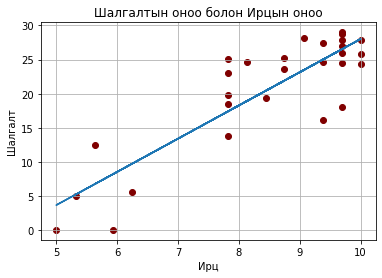

In [62]:
#2.Энгийн регресс ашиглан "шалгалтын оноо" (y) -ийг "ирцийн оноо" (x) -р тайлбарлана уу.
y0 = np.array(total['Шалгалт-30'])
x0 = np.array(total['Ирц-10'])
reg1 = 'y0~x0'
reg2 = smf.ols(reg1, total).fit()
print(reg2.summary())


#Scatter
plt.scatter(x0,y0, color = 'maroon')
z = np.polyfit(x0, y0, 1)
p = np.poly1d(z)
plt.plot(x0, p(x0))

plt.xlabel("Ирц")
plt.ylabel("Шалгалт")
plt.title("Шалгалтын оноо болон Ирцын оноо")
plt.grid()

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.4500
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.508
Time:                        23:33:29   Log-Likelihood:                -19.784
No. Observations:                  28   AIC:                             43.57
Df Residuals:                      26   BIC:                             46.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8317      0.412      6.868      0.0

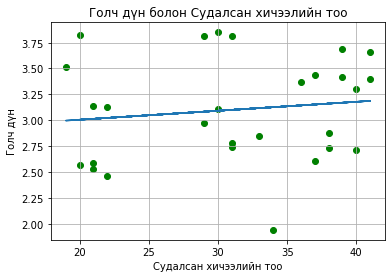

In [63]:
#3.Энгийн регресс ашиглан “Голч дүн” (y) –ийг “Судалсан хичээлийн тоо” (x) –р тайлбарлана уу.
y1 = np.array(detail['Голч дүн'])
x1 = np.array(detail['Судалсан хичээлийн тоо'])
reg3 = 'y1~x1'
reg4 = smf.ols(reg3, detail).fit()
print(reg4.summary())

#Scatter
plt.scatter(x1,y1, color = 'green')
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
plt.plot(x1, p(x1))
plt.xlabel("Судалсан хичээлийн тоо")
plt.ylabel("Голч дүн")
plt.title("Голч дүн болон Судалсан хичээлийн тоо")
plt.grid()


                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9211
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.346
Time:                        23:34:12   Log-Likelihood:                -19.536
No. Observations:                  28   AIC:                             43.07
Df Residuals:                      26   BIC:                             45.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7162      1.446      1.187      0.2

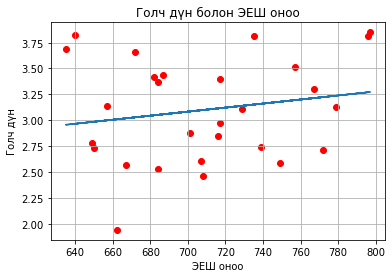

In [65]:
#4.“Голч дүн” болон “ЭЕШ оноо”-ний хамаарлыг ЕХБК-р үнэлэн огтлогч (B0) болон налууг (B1)-г олно уу. 
#Регрессийг графикаар дүрсэл.
y2 = np.array(detail['Голч дүн'])
x2 = np.array(detail['ЭЕШ оноо'])
reg5 = 'y2~x2'
reg6 = smf.ols(reg5, detail).fit()
print(reg6.summary())

#Scatter
plt.scatter(x2,y2, color = 'red')
z = np.polyfit(x2, y2, 1)
p = np.poly1d(z)
plt.plot(x2, p(x2))
plt.xlabel("ЭЕШ оноо")
plt.ylabel("Голч дүн")
plt.title("Голч дүн болон ЭЕШ оноо")
plt.grid()


#model formula
print(reg6.params)

In [29]:
#5.ЭЕШ-ийн оноо 620 байхад голч дүн хэд байхаар таамаглагдаж байгааг олно уу. 
onoo = 620
coef = pd.DataFrame(reg6.params).transpose()
predict = coef['Intercept'] + coef['x2'] * onoo
print('ЭЕШ-ийн оноо 620 байхад голч дүн хэд байхаар таамаглагдаж: ', predict)

ЭЕШ-ийн оноо 620 байхад голч дүн хэд байхаар таамаглагдаж:  0    2.92673
dtype: float64


Text(0.5, 1.0, 'Оюутнуудын нийт дүн')

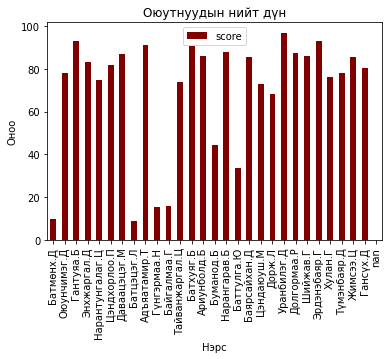

In [30]:
#6.Оюутнуудын нийт дүн баганыг ашиглан оюутан бүр багтсан Barchart үүсгэнэ үү. 
name = total['Оюутны нэр']
score = total['Нийт']
df = pd.DataFrame({'name':name,'score':score})

df.plot.bar(x = 'name', color='maroon')
plt.xlabel("Нэрс")
plt.ylabel("Оноо")
plt.title("Оюутнуудын нийт дүн")

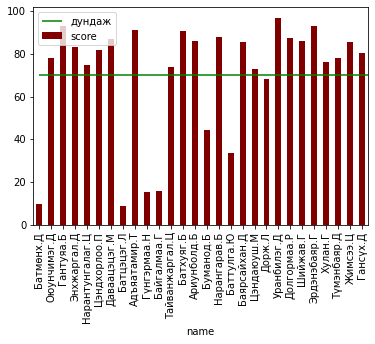

In [77]:
#7.Үүсгэсэн Barchart дээр дүнгийн дундажийг харуулсан Linechart оруулна уу. 
mean = total['Нийт'].mean()
name = total['Оюутны нэр']
score = total['Нийт']
df = pd.DataFrame({'name':name,'score':score})

df.plot.bar(x = 'name', color='maroon')
plt.hlines(mean, 0, 100, color='green',label='дундаж')
plt.legend(loc='upper left')

In [ ]:
#8.Тухайн хичээлд “A”, ”B”, ”C”, ”D”, ”F” дүн авсан оюутнуудын тоог ашиглан Piechart үүсгэнэ үү. 
unelgee = pd.DataFrame(total['Дүн'].value_counts())
unelgee.plot.pie(y = 'Дүн', figsize=(15, 7), autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Суралцаж буй мэргэжил'>], dtype=object)

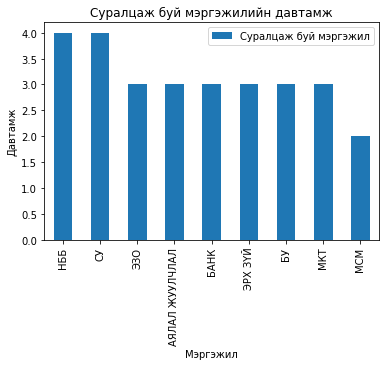

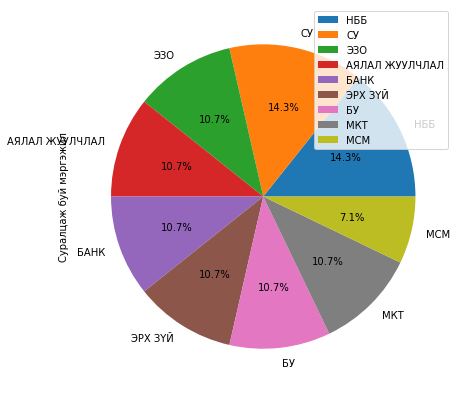

In [44]:
#9.Тухайн хичээлд мэргэжил тус бүрээс хэдэн оюутан суралцсаныг тоолж Barchart, Piechart үүсгэнэ үү. 
major = pd.DataFrame(detail['Суралцаж буй мэргэжил'].value_counts())
major.plot.bar()
plt.xlabel("Мэргэжил")
plt.ylabel("Давтамж")
plt.title("Суралцаж буй мэргэжилийн давтамж")


major.plot.pie(subplots=True, figsize=(15, 7), autopct='%1.1f%%')

In [38]:
#10.Нэмэлт ямар шинжилгээ хийх боломжтойг судлан, дурын шинжилгээ хийж үр дүнг танилцуулна уу.
#Голч дүн нь судалсан хичээлийн тоо, ЭЕШ онооноос хамаарасан олон хүчин зүйлийн шинжилгээ.
y = detail['Голч дүн']
x_1 = detail['ЭЕШ оноо']
x_2 = detail['Судалсан хичээлийн тоо']
reg10 = 'y2 ~ x_2 + x_1'
reg11 = smf.ols(reg10, detail).fit()
print(reg11.summary())


                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7235
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.495
Time:                        23:13:15   Log-Likelihood:                -19.236
No. Observations:                  28   AIC:                             44.47
Df Residuals:                      25   BIC:                             48.47
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3482      1.542      0.874      0.3

(array([1., 0., 1., 4., 6., 1., 3., 5., 1., 6.]),
 array([1.94 , 2.131, 2.322, 2.513, 2.704, 2.895, 3.086, 3.277, 3.468,
        3.659, 3.85 ]),
 <BarContainer object of 10 artists>)

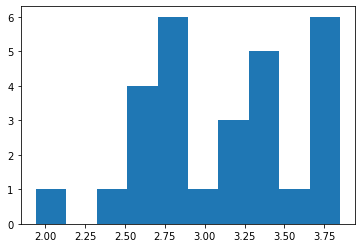

In [47]:
#10.Голч дүнгийн хистограмм
h = detail['Голч дүн']
plt.hist(h)